## Image Segmentation Using openCV

In [180]:
import cv2 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Using Thresholding

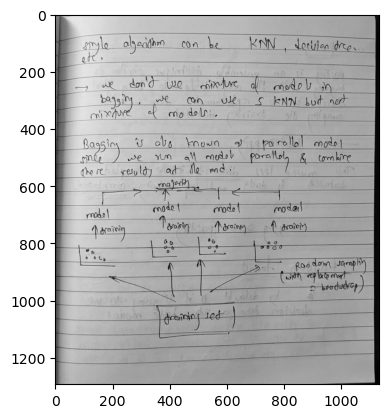

In [181]:
## Simple Thrsholding 
image=cv2.imread('images/handwritten.jpeg',0)
plt.imshow(image,cmap='gray')


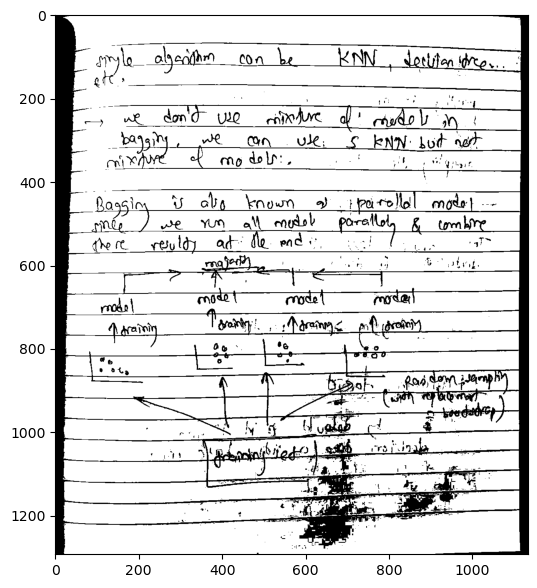

In [182]:
retval , binary=cv2.threshold(image,150,255,cv2.THRESH_BINARY)

plt.figure(figsize=(12,7))
plt.imshow(binary , cmap='gray')
plt.show()

## Adaptive Thrsholding 

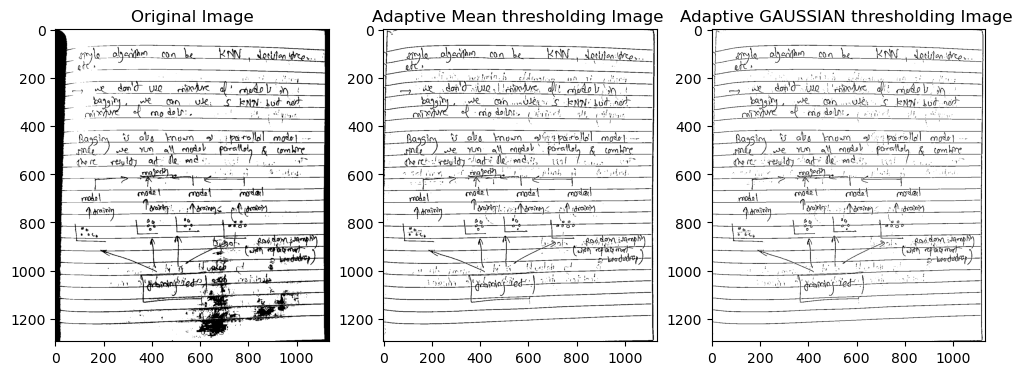

In [183]:
Adaptive_m=cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY,11,9) ### 9 it controols the noise  11 :Block size
Adaptive_g=cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY,11,9)

plt.figure(figsize=(12,7))
plt.subplot(1,3,1)
plt.imshow(binary , cmap='gray')
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(Adaptive_m , cmap='gray')
plt.title("Adaptive Mean thresholding Image ")

plt.subplot(1,3,3)
plt.imshow(Adaptive_g , cmap='gray')
plt.title("Adaptive GAUSSIAN thresholding Image ")
plt.show()

## K Means Clustaring 

[[255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 ...
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]]


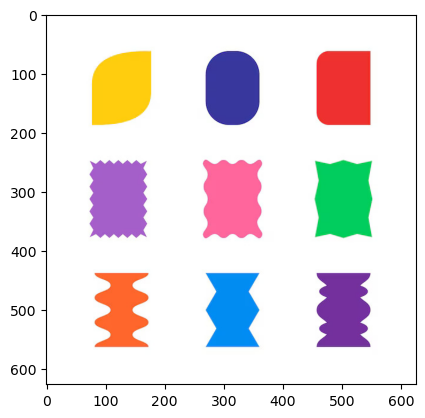

In [184]:
image=cv2.imread('images/shapes.jpg')
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

pixel_value=image_rgb.reshape((-1,3)) ## Faltten This image 
pixel_value=np.float32(pixel_value)
print(pixel_value)

plt.imshow(image_rgb)

In [185]:
criteria=(cv2.TERM_CRITERIA_EPS +cv2.TERM_CRITERIA_MAX_ITER , 100,0.2)
k=3 
_,labels,centers=cv2.kmeans(pixel_value,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [186]:
print(labels.shape)
print(centers)


(391876, 1)
[[249.43346  114.88152   69.147255]
 [255.2777   255.2192   255.20657 ]
 [ 70.9147   110.96521  167.68669 ]]


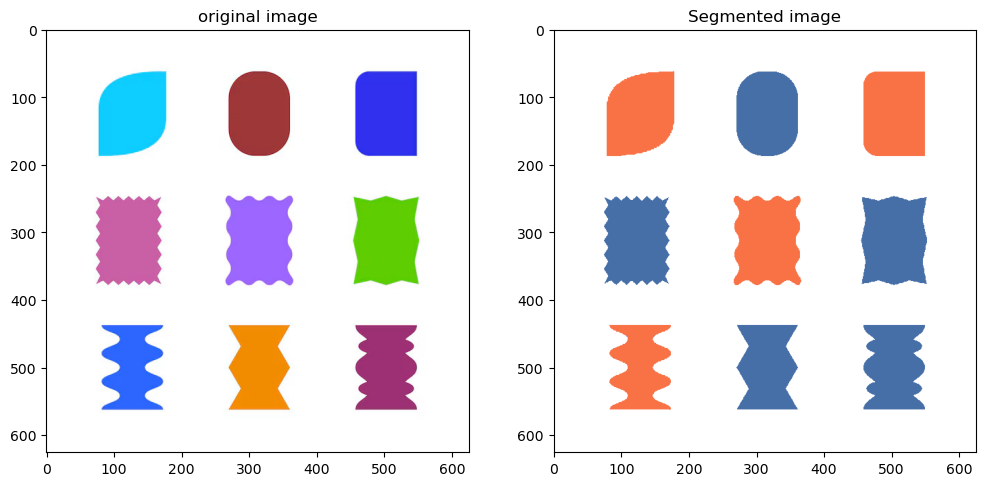

In [187]:
centers=np.uint8(centers)
segmented_image=centers[labels.flatten()]

segmented_image=segmented_image.reshape(image.shape)



# 1-> [255,255,255]
# 0->[255.2777  , 255.2192 ,  255.20657]

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("original image")


plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title("Segmented image")

plt.show()


## Watershed alghorithem 

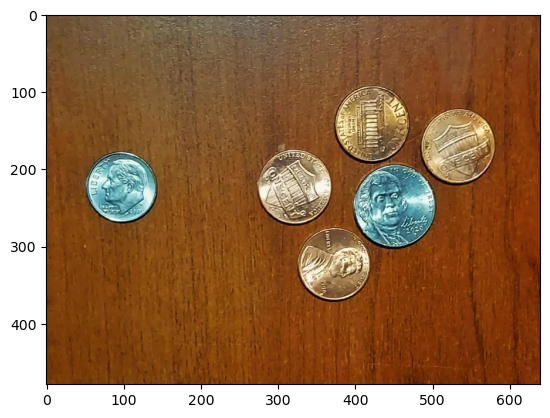

In [188]:
image=cv2.imread('images/coin2.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

original_image=image.copy()

plt.imshow(image)

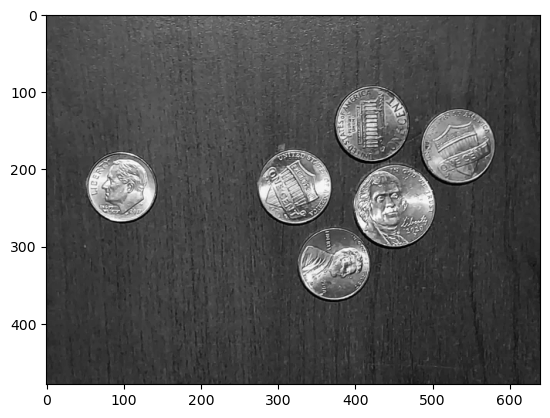

In [189]:
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image,cmap='gray')

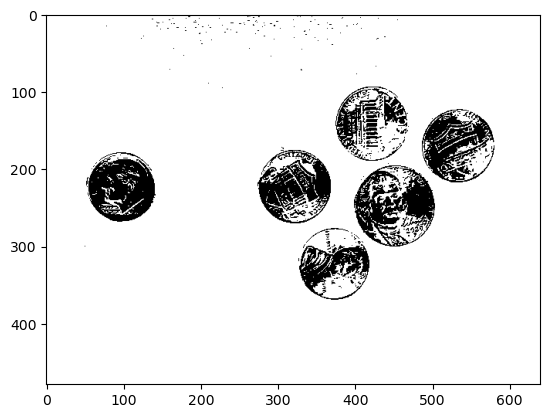

In [190]:
_,thresh=cv2.threshold(gray_image,130,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh,cmap='gray')



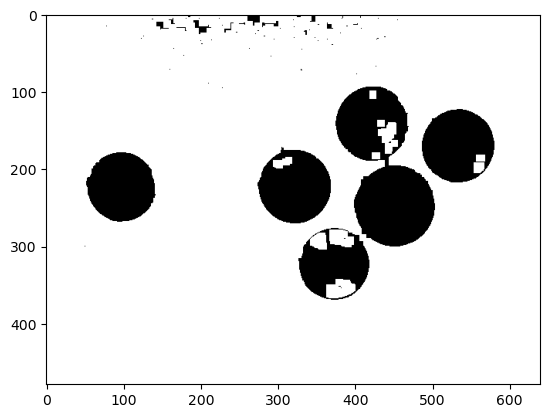

In [191]:
## Remove the noise 

kernal=np.ones((3,3),np.uint8)

opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernal,iterations=4)

plt.imshow(opening , cmap='grey')

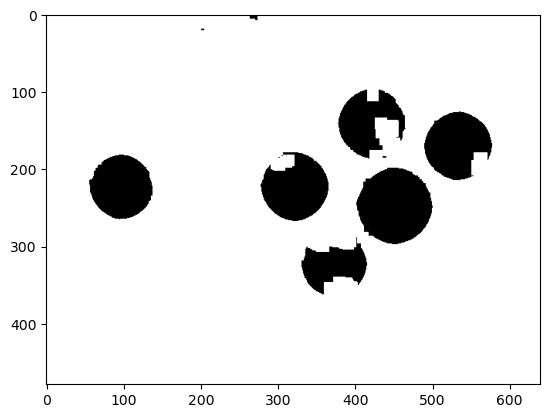

In [192]:
sure_bg=cv2.dilate(opening, kernal,iterations=3)

plt.imshow(sure_bg,cmap='gray')

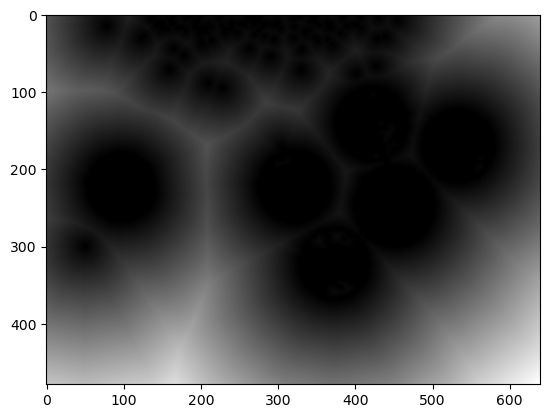

In [193]:
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)

plt.imshow(dist_transform,cmap='grey')

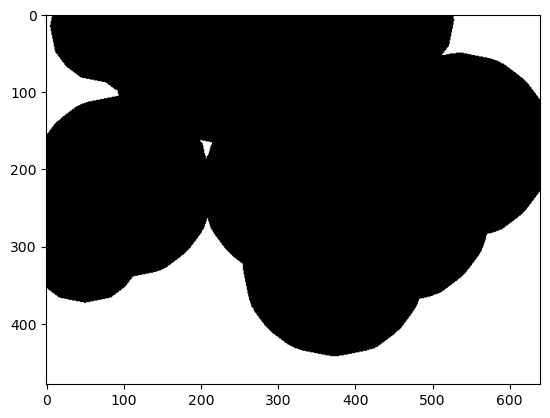

In [194]:
_,sure_fg=cv2.threshold(dist_transform,0.3*dist_transform.max(),255,0)

sure_fg=np.uint8(sure_fg)

plt.imshow(sure_fg,cmap='grey')

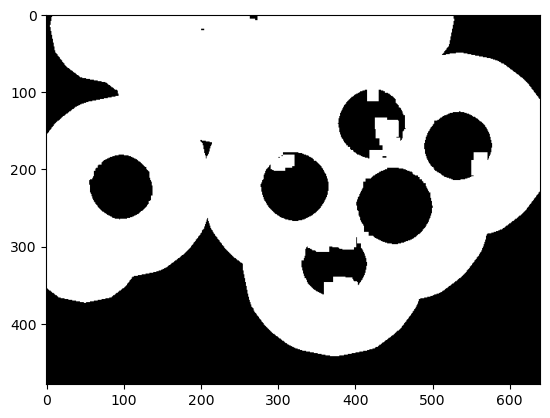

In [195]:
unkown=cv2.subtract(sure_bg,sure_fg)
plt.imshow(unkown,cmap='grey')

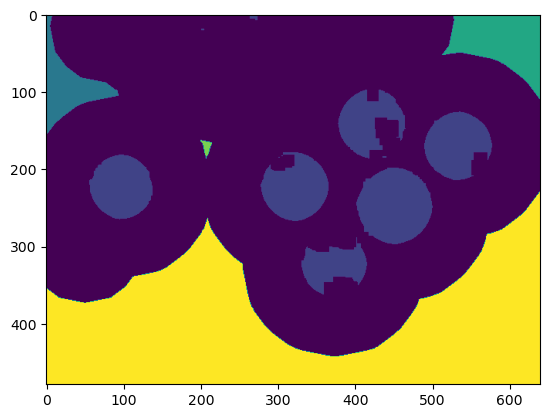

In [196]:
_,markers=cv2.connectedComponents(sure_fg)
markers=markers+1
markers[unkown==255]=0


plt.imshow(markers)

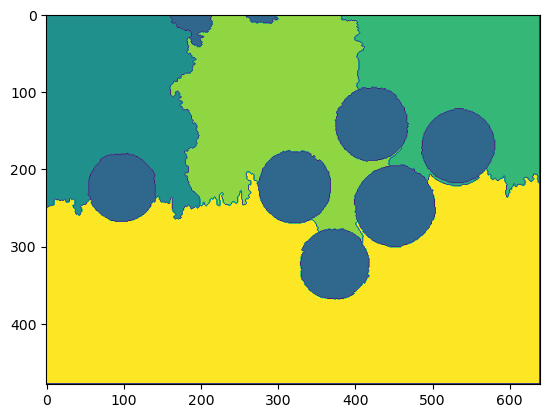

In [197]:
markers=cv2.watershed(image,markers)

plt.imshow(markers)

In [205]:
coin_mask=np.zeros_like(gray_image)



print(gray_image.shape)
print(coin_mask.shape) ## Should Alwayes be the same 


uniqe_labels=np.unique(markers)


instance_number=1 

font=cv2.FONT_HERSHEY_SIMPLEX

for label in uniqe_labels:
    if label==0 or label ==-1:
        continue

    mask=np.uint8(markers==label)  ##np.uint8 : Converts the True/False values to 0 and 1
    Countours,_=cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in Countours:
        area=cv2.contourArea(contour)
        perimeter=cv2.arcLength(contour,True)

        if perimeter == 0 : 
            continue 

        circularity=4* np.pi * (area / (perimeter*perimeter))
        
        if 0.7<circularity<1.2 and area >1000:
            cv2.drawContours(original_image,[contour] ,-1,(0,255,0),2)
            x,y,w,h=cv2.boundingRect(contour)
            cv2.putText(original_image , f' coin {instance_number}',(x,y-10) , font,0.6,(255,0,0),2)
            coin_mask=cv2.bitwise_or(coin_mask,mask)
            cv2.rectangle(original_image, (x - 5, y - 5), (x + w + 5, y + h + 5), (160, 150, 250), 2)
            instance_number += 1
           



(479, 640)
(479, 640)


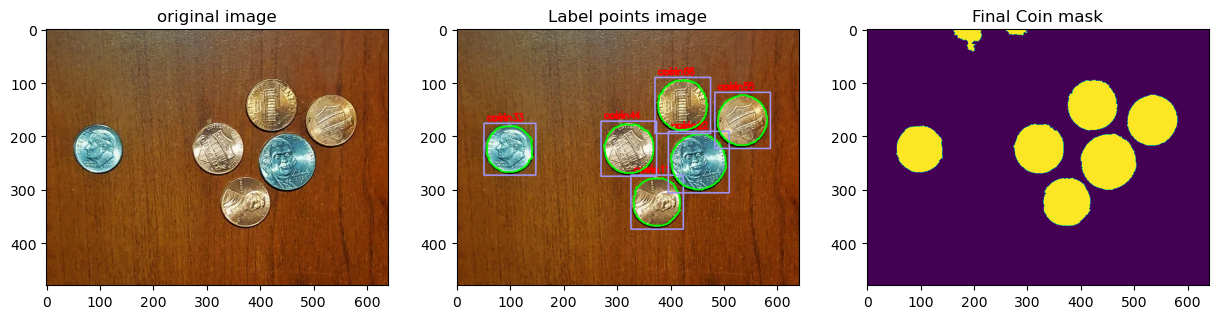

In [206]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.imshow(image)
plt.title("original image")


plt.subplot(1,3,2)
plt.imshow(original_image)
plt.title("Label points image")


plt.subplot(1,3,3)
plt.imshow(coin_mask)
plt.title("Final Coin mask")

plt.show()

In [200]:
uniqe_labels = np.unique(markers)
instance_number = 1
font = cv2.FONT_HERSHEY_SIMPLEX

for label in uniqe_labels:
    if label == 0 or label == -1:
        continue

    mask = np.uint8(markers == label)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)

        if perimeter == 0:
            continue

        circularity = 4 * np.pi * (area / (perimeter * perimeter))

        if 0.7 < circularity < 1.2 and area > 1000:
            cv2.drawContours(original_image, [contour], -1, (0, 255, 0), 2)
            x, y, w, h = cv2.boundingRect(contour)
            cv2.putText(original_image, f'coin {instance_number}', (x, y - 10), font, 0.6, (255, 0, 0), 2)
            coin_mask = cv2.bitwise_or(coin_mask, mask)
            cv2.rectangle(original_image, (x - 5, y - 5), (x + w + 5, y + h + 5), (160, 150, 250), 2)
            instance_number += 1


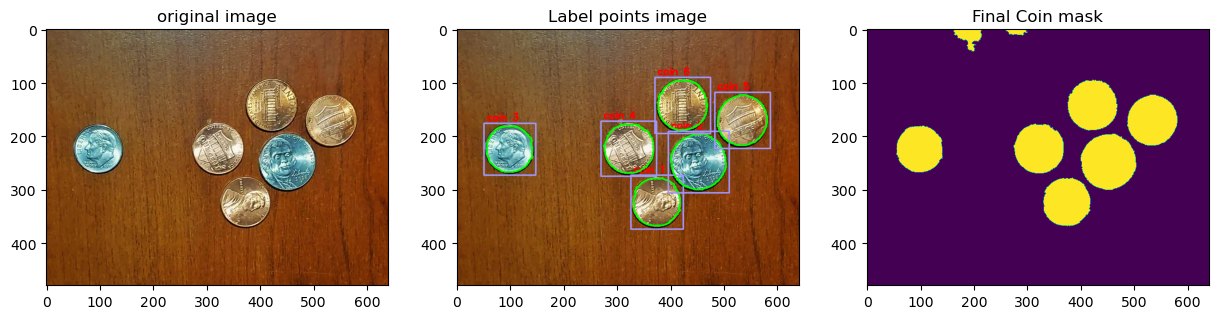

In [201]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.imshow(image)
plt.title("original image")


plt.subplot(1,3,2)
plt.imshow(original_image)
plt.title("Label points image")


plt.subplot(1,3,3)
plt.imshow(coin_mask)
plt.title("Final Coin mask")

plt.show()